In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
wine = load_wine()
wine
wine.data
wine.target
#切分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)
#建立模型
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)
#查看模型效果
score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)
#打印最后结果
print("Single Tree:",score_c)
print("Random Forest:",score_r)


Single Tree: 0.9444444444444444
Random Forest: 1.0


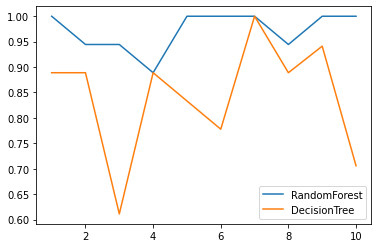

In [2]:
from sklearn.model_selection import cross_val_score
rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10)
clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10)
plt.plot(range(1,11),rfc_s,label = "RandomForest")
plt.plot(range(1,11),clf_s,label = "DecisionTree")
plt.legend()
plt.show()


RandomForest:
0.9663398692810456
DecisionTree:
0.865032679738562


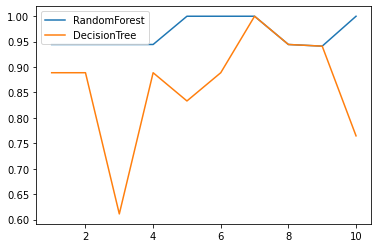

In [3]:
#一种更加有趣也更简单的写法
label = "RandomForest"
for model in [RandomForestClassifier(n_estimators=25),DecisionTreeClassifier()]:
    score = cross_val_score(model,wine.data,wine.target,cv=10)
    print("{}:".format(label)),print(score.mean())
    plt.plot(range(1,11),score,label = label)
    plt.legend()
    label = "DecisionTree"


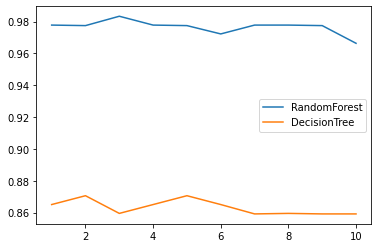

In [4]:
#画出随机森林和决策树在十组交叉验证下的效果对比
rfc_l = []
clf_l = []
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_l.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_l.append(clf_s)
#绘制结果曲线
plt.plot(range(1,11),rfc_l,label = "RandomForest")
plt.plot(range(1,11),clf_l,label = "DecisionTree")
plt.legend()
plt.show()


0.9888888888888889 46


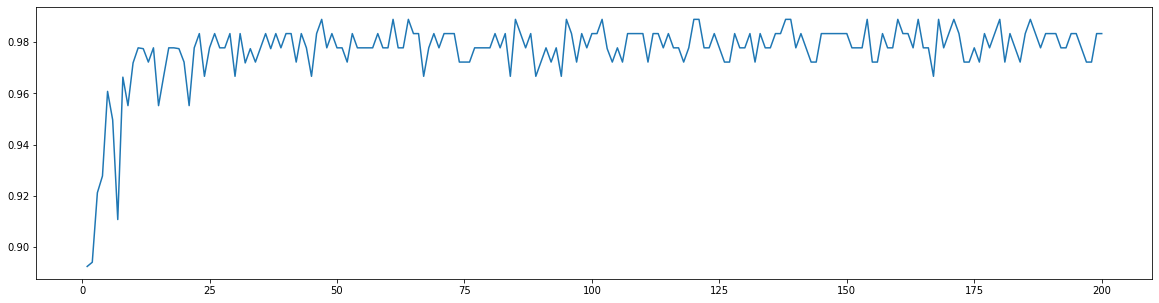

In [5]:
#n_estimators的学习曲线
#======【TIME WARNING: 2mins 30 seconds】==========#
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa)))
plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)
plt.show()
